In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt

eps = np.finfo(float).eps

In [2]:
def euclidianDistance(row1 , row2):
    distance = 0
    for i in range(1 , row2.shape[0] - 1):
        distance += np.square(row1[i]-row2[i])
    return np.sqrt(distance)

In [3]:
def manhattanDistance(row1 , row2):
    distance = 0
    for i in range(1 , row2.shape[0] - 1):
        distance += abs(row1[i]-row2[i])
    return np.sqrt(distance)

In [4]:
def minkowskiDistance(row1 , row2):
    distance = 0
    for i in range(1 , row2.shape[0] - 1):
        distance += (abs(row1[i]-row2[i]))**3
    return np.sqrt(distance)

In [5]:
def distanceCalculator(df, row , distUsing = 'euclidian'):
    distance = []
    index = []
    dist = 0
    for i in range(0 ,len(df)):
        if distUsing == 'euclidian':
            dist = euclidianDistance(df.loc[i,:] , row)
        if distUsing == 'manhattan':
            dist = manhattanDistance(df.loc[i,:] , row)
        if distUsing == 'minkowski':
            dist = minkowskiDistance(df.loc[i,:] , row)
        distance.append(dist)
        index.append(i)
    return [distance, index]

In [6]:
def sortedDistanceDF(df , distance_index):
    df['distance'] = distance_index[0]
    df['index'] = distance_index[1]
    df = df.sort_values(['distance','index'])
    return df

In [7]:
def firstK(df,k):
    return df.head(k)

In [8]:
def majority(df):
    clValue,counts = np.unique(df[Class],return_counts=True)  
    return clValue[np.argmax(counts)]

In [9]:
def KNN_algo(df, row, k, distUsing = 'euclidian'):
    distance_index = distanceCalculator(df, row, distUsing)
    df = sortedDistanceDF(df , distance_index)
    df = firstK(df,k)
    predict = majority(df);
    return predict


In [10]:
def accuracy(confusion):
    correct = 0
    total = 0
    for i in range(2):
        for j in range(2):
            if i==j:
                correct += confusion[i][j]
            total += confusion[i][j]
    
    return 100*correct/(float(total))


In [11]:
def scores(ClassValue, confusion):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for predict in range(0,2):
        for actual in range(0,2):
            if predict == ClassList.index(ClassValue) and actual == ClassList.index(ClassValue):
                true_positive += confusion[predict][actual]
            elif predict == ClassList.index(ClassValue) and actual != ClassList.index(ClassValue):
                false_positive += confusion[predict][actual]
            elif predict != ClassList.index(ClassValue) and actual == ClassList.index(ClassValue):
                false_negative += confusion[predict][actual]
            else:
                true_negative += confusion[predict][actual]
    return true_positive, true_negative, false_positive, false_negative

In [12]:
def recall(true_positive , false_negative):
    return true_positive*100/(true_positive +  false_negative+ eps)

In [13]:
def precision(true_positive , false_positive):
    return true_positive*100/(true_positive +  false_positive + eps)

In [14]:
def f1score(recall , prescision):
    return 2/(1/(float(recall)+eps)+1/(float(prescision)+eps))

In [15]:
def plotter(x_axis, y_axis):
    plt.figure(num=None, figsize=(6, 4), dpi=150, facecolor='w', edgecolor='k')
    # plotting the points  
    plt.plot(x_axis, y_axis) 
    # naming the x axis 
    plt.xlabel('K') 
    # naming the y axis 
    plt.ylabel('Accuracy') 

    # giving a title to my graph 
    plt.title('Accuracy-vs-K') 
    plt.grid(True)
    # function to show the plot 
    plt.show()

In [16]:
def validation(trainingSet, validationSet, distUsing = 'euclidian'):
    listK = []
    listACC = []
    lastK = int(np.sqrt(len(trainingSet)))
    print("Validating data set using ",distUsing," distance ")
    for k in range(1 , lastK + 1):
        confusion = [[0,0],[0,0]]
        for index, row in validationSet.iterrows():
            result = KNN_algo(trainingSet,row,k, distUsing)
            confusion[ClassList.index(result)][ClassList.index(row[Class])] += 1
        print("---------------------------------------------------------------------------------------------------")
        print("                                          FOR K = ", k)
        print("---------------------------------------------------------------------------------------------------")
        print("confusion matrix: ")
        for lst in confusion:
            for i in lst:
                print(i," ",end='')
            print("\n")
        print("----------------------------------------------------------------------")
        print(" ")
        acc = accuracy(confusion)
        print ("ACCURACY: " , acc)
        for ClassValue in ClassList:
            true_positive, true_negative, false_positive, false_negative = scores(ClassValue , confusion)
            rec = recall(true_positive , false_negative)
            pre = precision(true_positive , false_positive)
            f1 = f1score(rec, pre)
            print(" ")
            print("------------Class Value ",ClassValue,"Scores are------------")
            print(" ")
            print("RECALL: ", rec)
            print("PRECISION: ", pre)
            print("F1-score: ", f1)
        print(" ")
        print("--END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END--")
        print(" ")
        listK.append(k)
        listACC.append(acc)
    plotter(listK, listACC)
    return listK, listACC

        

In [17]:
randomDataSet = dataSet = pd.read_csv("./../input_data/AdmissionDataset/data.csv")
# randomDataSet = dataSet.sample(frac=1).reset_index(drop=True)
Class = "Chance of Admit"
columns = ['Serial No.' , 'GRE Score' , 'TOEFL Score' , 'University Rating' , 'SOP' , 'LOR' , 'CGPA' , 'Research' , Class]
randomDataSet.columns = columns
columns = columns[1:]
randomDataSet = randomDataSet[columns]

randomDataSet

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74
5,302,102,3,3.5,5.0,8.33,0,0.65
6,322,110,5,4.5,4.0,8.97,0,0.78
7,307,107,2,3.0,3.5,8.52,1,0.78
8,315,105,3,2.0,2.5,8.48,0,0.75
9,296,97,2,1.5,2.0,7.80,0,0.49


In [18]:
ClassBinaryList = []
for i in range(0 , len(randomDataSet)):
    if randomDataSet.iloc[i][-1] >= 0.5:
        ClassBinaryList.append(1)
    else:
        ClassBinaryList.append(0)
randomDataSet[Class] = ClassBinaryList

/Users/martian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [19]:
randomDataSet

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,1
1,319,108,3,3.0,3.5,8.54,1,1
2,322,110,3,3.5,2.5,8.67,1,1
3,326,113,5,4.5,4.0,9.40,1,1
4,319,106,3,3.5,2.5,8.33,1,1
5,302,102,3,3.5,5.0,8.33,0,1
6,322,110,5,4.5,4.0,8.97,0,1
7,307,107,2,3.0,3.5,8.52,1,1
8,315,105,3,2.0,2.5,8.48,0,1
9,296,97,2,1.5,2.0,7.80,0,0


In [20]:
trainingSet, validationSet = np.split(randomDataSet, [int(0.8*len(randomDataSet))])
clvalue,counts = np.unique(randomDataSet[Class],return_counts=True) 
ClassList = list(clvalue)
# print(ClassList)
# print(ClassList.index('Iris-virginica'))

Validating data set using  euclidian  distance 
---------------------------------------------------------------------------------------------------
                                          FOR K =  1
---------------------------------------------------------------------------------------------------
confusion matrix: 
5  4  

4  77  

----------------------------------------------------------------------
 
ACCURACY:  91.11111111111111
 
------------Class Value  0 Scores are------------
 
RECALL:  55.55555555555556
PRECISION:  55.55555555555556
F1-score:  55.55555555555556
 
------------Class Value  1 Scores are------------
 
RECALL:  95.06172839506173
PRECISION:  95.06172839506173
F1-score:  95.06172839506173
 
--END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END--
 
---------------------------------------------------------------------------------------------------
                                          FOR K =  2
----------------------------

---------------------------------------------------------------------------------------------------
                                          FOR K =  12
---------------------------------------------------------------------------------------------------
confusion matrix: 
5  2  

4  79  

----------------------------------------------------------------------
 
ACCURACY:  93.33333333333333
 
------------Class Value  0 Scores are------------
 
RECALL:  55.55555555555556
PRECISION:  71.42857142857143
F1-score:  62.5
 
------------Class Value  1 Scores are------------
 
RECALL:  97.53086419753086
PRECISION:  95.18072289156626
F1-score:  96.34146341463415
 
--END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END--
 
---------------------------------------------------------------------------------------------------
                                          FOR K =  13
---------------------------------------------------------------------------------------

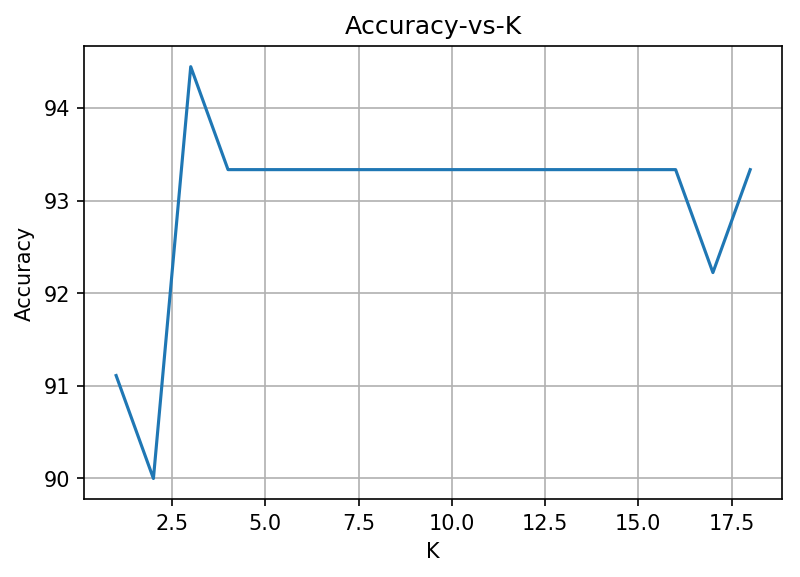

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [91.11111111111111,
  90.0,
  94.44444444444444,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  92.22222222222223,
  93.33333333333333])

In [21]:
validation(trainingSet, validationSet)

Validating data set using  manhattan  distance 
---------------------------------------------------------------------------------------------------
                                          FOR K =  1
---------------------------------------------------------------------------------------------------
confusion matrix: 
5  3  

4  78  

----------------------------------------------------------------------
 
ACCURACY:  92.22222222222223
 
------------Class Value  0 Scores are------------
 
RECALL:  55.55555555555556
PRECISION:  62.5
F1-score:  58.8235294117647
 
------------Class Value  1 Scores are------------
 
RECALL:  96.29629629629629
PRECISION:  95.1219512195122
F1-score:  95.70552147239265
 
--END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END--
 
---------------------------------------------------------------------------------------------------
                                          FOR K =  2
-------------------------------------------

---------------------------------------------------------------------------------------------------
                                          FOR K =  12
---------------------------------------------------------------------------------------------------
confusion matrix: 
4  2  

5  79  

----------------------------------------------------------------------
 
ACCURACY:  92.22222222222223
 
------------Class Value  0 Scores are------------
 
RECALL:  44.44444444444444
PRECISION:  66.66666666666667
F1-score:  53.333333333333336
 
------------Class Value  1 Scores are------------
 
RECALL:  97.53086419753086
PRECISION:  94.04761904761905
F1-score:  95.75757575757575
 
--END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END--
 
---------------------------------------------------------------------------------------------------
                                          FOR K =  13
-------------------------------------------------------------------------

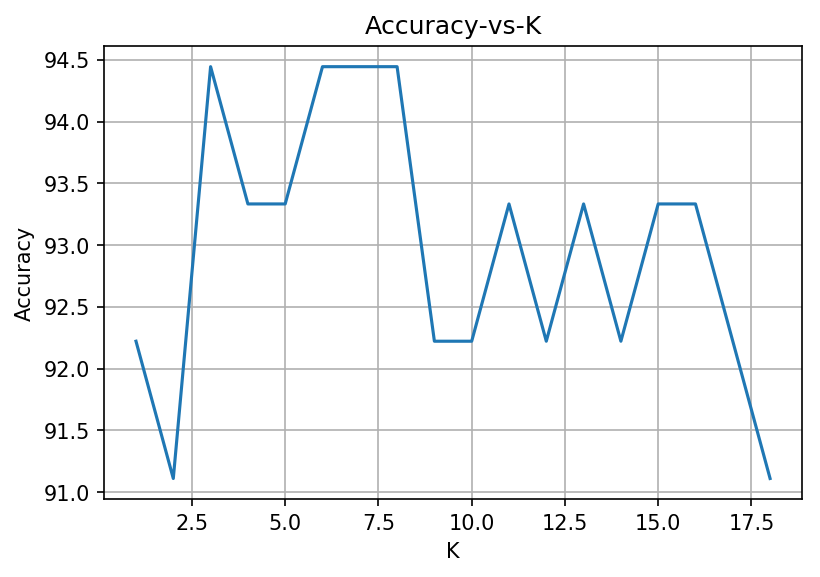

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [92.22222222222223,
  91.11111111111111,
  94.44444444444444,
  93.33333333333333,
  93.33333333333333,
  94.44444444444444,
  94.44444444444444,
  94.44444444444444,
  92.22222222222223,
  92.22222222222223,
  93.33333333333333,
  92.22222222222223,
  93.33333333333333,
  92.22222222222223,
  93.33333333333333,
  93.33333333333333,
  92.22222222222223,
  91.11111111111111])

In [22]:
validation(trainingSet, validationSet, 'manhattan')

Validating data set using  minkowski  distance 
---------------------------------------------------------------------------------------------------
                                          FOR K =  1
---------------------------------------------------------------------------------------------------
confusion matrix: 
5  4  

4  77  

----------------------------------------------------------------------
 
ACCURACY:  91.11111111111111
 
------------Class Value  0 Scores are------------
 
RECALL:  55.55555555555556
PRECISION:  55.55555555555556
F1-score:  55.55555555555556
 
------------Class Value  1 Scores are------------
 
RECALL:  95.06172839506173
PRECISION:  95.06172839506173
F1-score:  95.06172839506173
 
--END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END--
 
---------------------------------------------------------------------------------------------------
                                          FOR K =  2
----------------------------

---------------------------------------------------------------------------------------------------
                                          FOR K =  12
---------------------------------------------------------------------------------------------------
confusion matrix: 
5  2  

4  79  

----------------------------------------------------------------------
 
ACCURACY:  93.33333333333333
 
------------Class Value  0 Scores are------------
 
RECALL:  55.55555555555556
PRECISION:  71.42857142857143
F1-score:  62.5
 
------------Class Value  1 Scores are------------
 
RECALL:  97.53086419753086
PRECISION:  95.18072289156626
F1-score:  96.34146341463415
 
--END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END-END--
 
---------------------------------------------------------------------------------------------------
                                          FOR K =  13
---------------------------------------------------------------------------------------

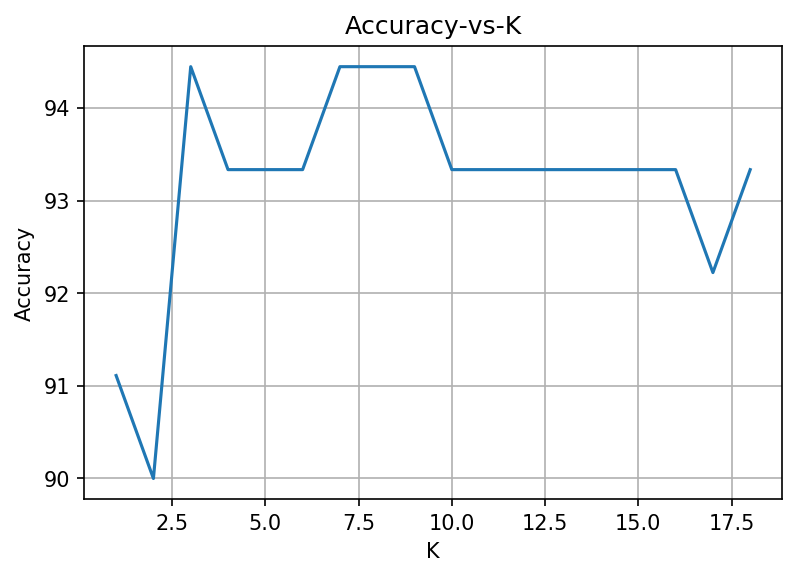

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [91.11111111111111,
  90.0,
  94.44444444444444,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  94.44444444444444,
  94.44444444444444,
  94.44444444444444,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  93.33333333333333,
  92.22222222222223,
  93.33333333333333])

In [23]:
validation(trainingSet, validationSet, 'minkowski')